In [ ]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
# Define stock ticker and Nifty 50 index ticker
stock_ticker = "RELIANCE.NS"  # Example: Reliance Industries
nifty_ticker = "^NSEI"  # Nifty 50 Index

# Define the time range (last 10 years)
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=10*365)).strftime('%Y-%m-%d')

# Fetch data from Yahoo Finance
stock_data = yf.download(stock_ticker, start=start_date, end=end_date)["Close"]
nifty_data = yf.download(nifty_ticker, start=start_date, end=end_date)["Close"]

# Combine both datasets into a single DataFrame
stock_data.rename(columns={"Close": "Stock_Close"}, inplace=True)
nifty_data.rename(columns={"Close": "Nifty_Close"}, inplace=True)

# Merge both datasets on the date index
data = stock_data.join(nifty_data, how="inner")
print(data)
# Split data into training and testing sets (80-20 split)
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]


# Split data into training and testing sets (80-20 split)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Display summary
print("Training Data:")
print(train_data.head())
print("\nTesting Data:")
print(test_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ticker      RELIANCE.NS         ^NSEI
Date                                 
2015-02-04   195.166138   8723.700195
2015-02-05   194.094482   8711.700195
2015-02-06   191.194717   8661.049805
2015-02-09   188.421021   8526.349609
2015-02-10   185.332169   8565.549805
...                 ...           ...
2025-01-27  1229.349976  22829.150391
2025-01-28  1234.400024  22957.250000
2025-01-29  1235.500000  23163.099609
2025-01-30  1253.050049  23249.500000
2025-01-31  1265.099976  23508.400391

[2460 rows x 2 columns]
Training Data:
Ticker      RELIANCE.NS        ^NSEI
Date                                
2015-02-04   195.166138  8723.700195
2015-02-05   194.094482  8711.700195
2015-02-06   191.194717  8661.049805
2015-02-09   188.421021  8526.349609
2015-02-10   185.332169  8565.549805

Testing Data:
Ticker      RELIANCE.NS         ^NSEI
Date                                 
2023-02-02  1066.487305  17610.400391
2023-02-03  1067.426880  17854.050781
2023-02-06  1059.383301  17764.599609
20

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
print(data.columns)
# Load the dataset from previous step (Ensure you have 'data' DataFrame)
stock_series = data["Stock_Close"]

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
        return True
    else:
        print("The series is NOT stationary.")
        return False

# Step 1: Check for stationarity
is_stationary = adf_test(stock_series)

# Step 2: Apply differencing until stationary
d = 0
while not is_stationary:
    stock_series = stock_series.diff().dropna()
    d += 1
    print(f"\nApplying {d} order differencing...\n")
    is_stationary = adf_test(stock_series)

print(f"Final differencing order (d) determined: {d}")

# Step 3: Plot ACF and PACF to determine p and q
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(stock_series, ax=axes[0])
plot_pacf(stock_series, ax=axes[1])
plt.show()

# Step 4: Fit ARIMA model (p, d, q values determined from ACF & PACF)
p = 1  # Modify based on PACF
q = 1  # Modify based on ACF
model = ARIMA(data["Stock_Close"], order=(p, d, q))
arima_result = model.fit()

# Print model summary
print(arima_result.summary())

# Step 5: Extract residuals for LSTM
residuals = arima_result.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals, label="Residuals")
plt.axhline(y=0, color='red', linestyle="--")
plt.legend()
plt.title("ARIMA Residuals")
plt.show()

# Convert residuals to DataFrame for LSTM processing
residuals_df = pd.DataFrame(residuals, columns=["Residuals"])


Index(['RELIANCE.NS', '^NSEI'], dtype='object', name='Ticker')


KeyError: 'Stock_Close'


Decomposition for RELIANCE.BO:


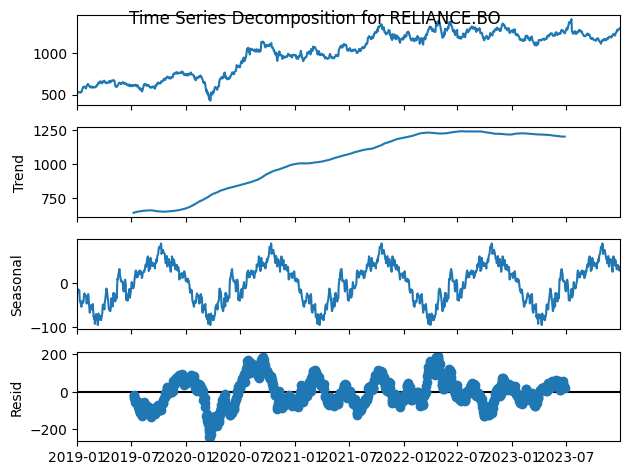


Decomposition for BHARTIARTL.BO:


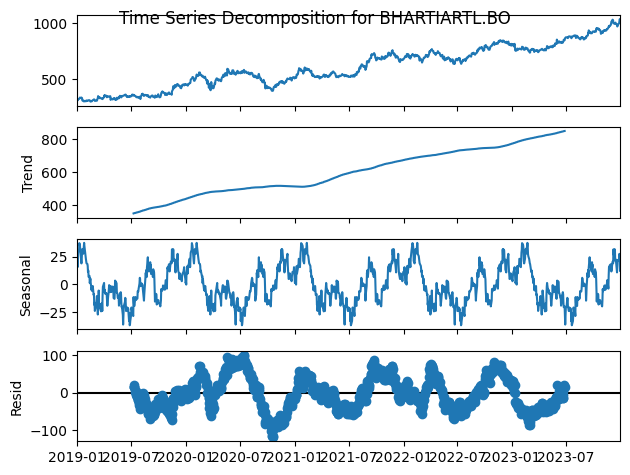


Decomposition for SBIN.BO:


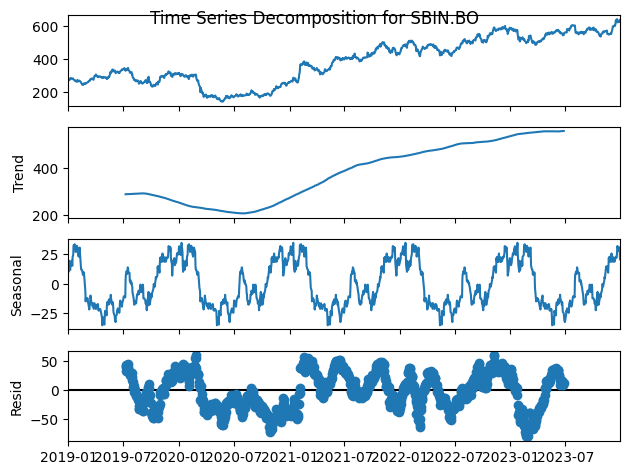

In [ ]:
# Step 2: Decompose time series and visualize
for stock in stocks:
    print(f"\nDecomposition for {stock}:")
    decomposition = sm.tsa.seasonal_decompose(df[stock], model="additive", period=252)
    decomposition.plot()
    plt.suptitle(f"Time Series Decomposition for {stock}")
    plt.show()


ARIMA Model for RELIANCE.BO
ACF and PACF for RELIANCE.BO:


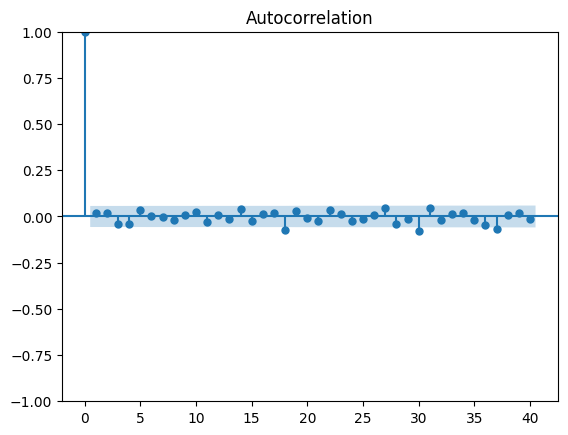

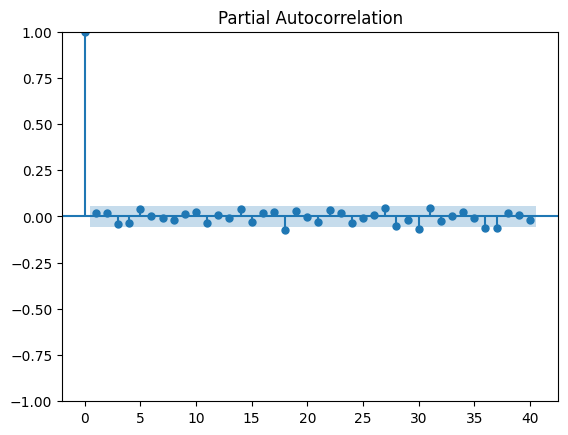

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

                               SARIMAX Results                                
Dep. Variable:            RELIANCE.BO   No. Observations:                 1184
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4992.465
Date:                Sun, 12 Jan 2025   AIC                           9990.929
Time:                        17:23:22   BIC                          10006.157
Sample:                             0   HQIC                          9996.669
                               - 1184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6324      4.111     -0.154      0.878      -8.689       7.424
ma.L1          0.6348      4.100      0.155      0.877      -7.401       8.671
sigma2       271.0931      6.594     41.110      0.0

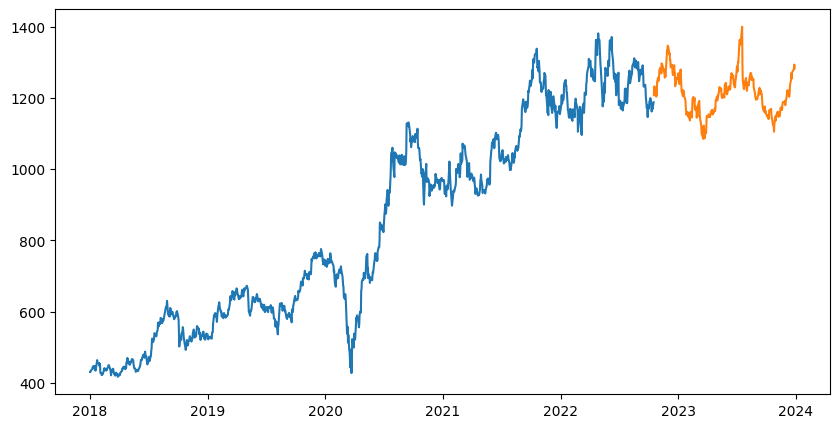

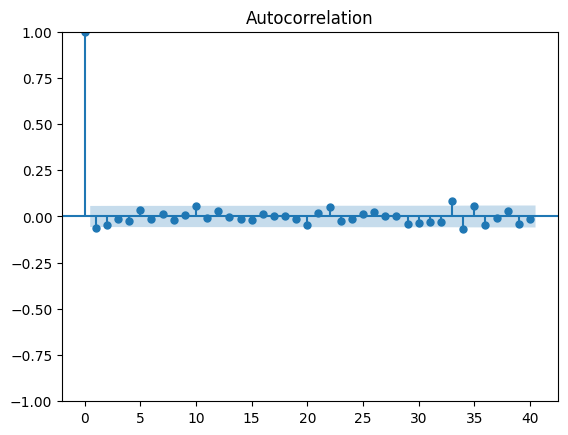

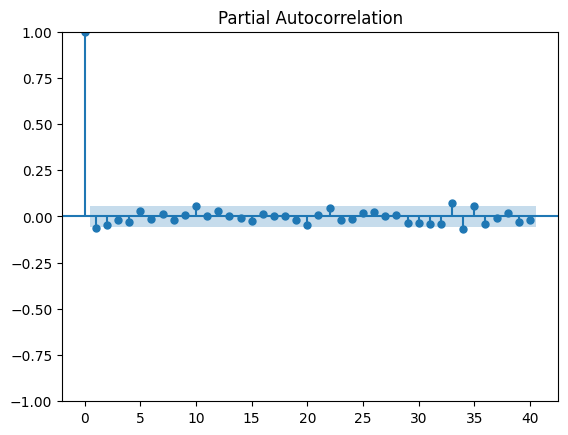

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          BHARTIARTL.BO   No. Observations:                 1184
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4437.428
Date:                Sun, 12 Jan 2025   AIC                           8880.857
Time:                        17:23:23   BIC                           8896.084
Sample:                             0   HQIC                          8886.597
                               - 1184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4616      0.205      2.253      0.024       0.060       0.863
ma.L1         -0.5342      0.198     -2.700      0.007      -0.922      -0.146
sigma2       106.0534      2.755     38.492      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


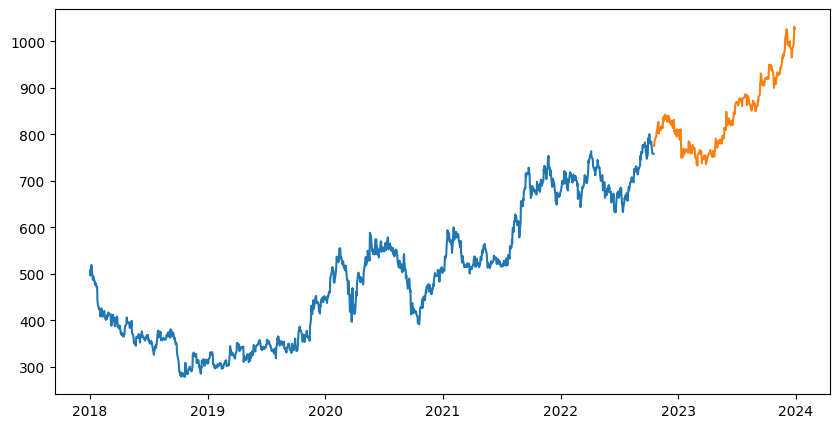

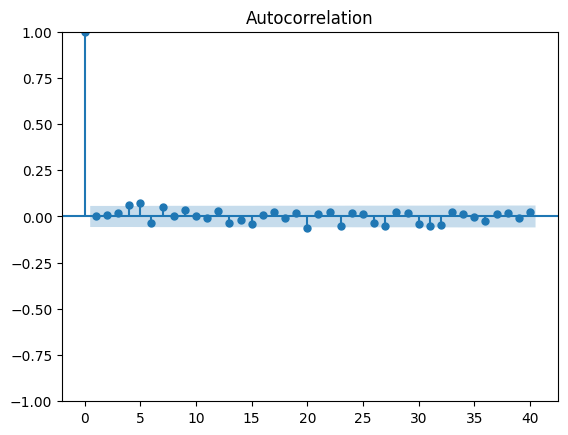

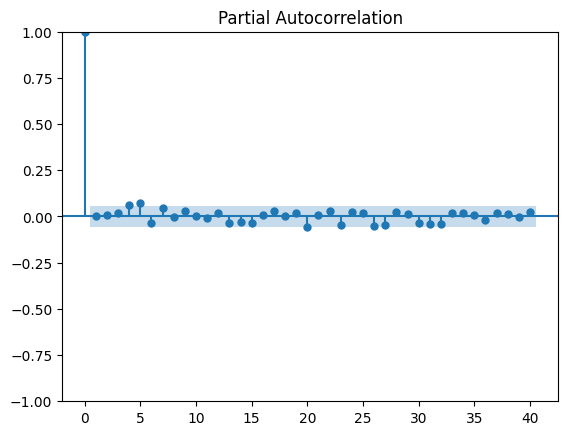

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                SBIN.BO   No. Observations:                 1184
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3922.701
Date:                Sun, 12 Jan 2025   AIC                           7851.403
Time:                        17:23:24   BIC                           7866.630
Sample:                             0   HQIC                          7857.143
                               - 1184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0011     18.870   5.71e-05      1.000     -36.984      36.986
ma.L1          0.0003     18.870   1.63e-05      1.000     -36.984      36.984
sigma2        44.4290      1.287     34.509      0.0

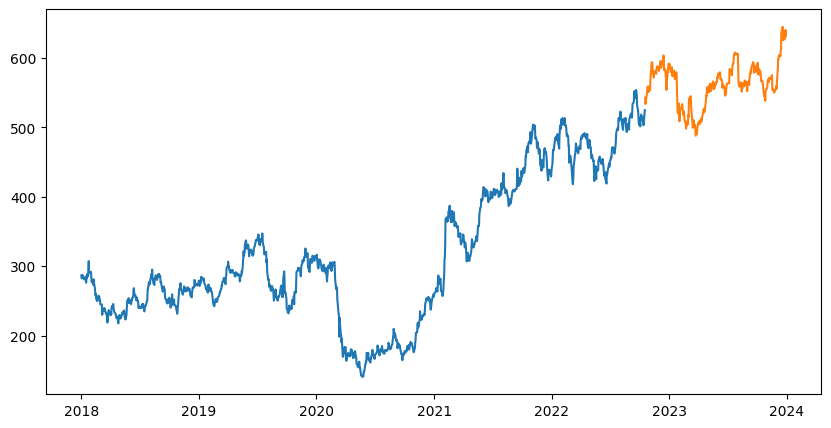

In [ ]:
# Task 3: Model Implementation and Forecasting
#For ARIMA, We want to get suitable values of p and q, so ACF and PACF is used.
# Train-Test Split
for stock in stocks:
    print(f"\nARIMA Model for {stock}")
    train_diff = train[stock].diff().dropna()
    # Plot ACF and PACF to determine p and q
    print(f"ACF and PACF for {stock}:")
    plot_acf(train_diff, lags=40)
    plot_pacf(train_diff, lags=40)
    plt.show()

    # Fit ARIMA model
    try:
        model = ARIMA(train[stock], order=(1, 1, 1))  # Adjust based on ACF/PACF plots
        arima_result = model.fit()
        print(arima_result.summary())

        # Forecasting done by ARIMA and rescaling
        forecast_diff = arima_result.forecast(steps=len(test))
        forecast = np.cumsum(forecast_diff) + train.iloc[-1][stock]

        # Plot results
        plt.figure(figsize=(10, 5))
        plt.plot(train[stock], label="Train")
        plt.plot(test[stock], label="Test")
        plt.plot(test.index, forecast, label="ARIMA Forecast")
        plt.title(f"ARIMA Forecast for {stock}")
        plt.legend()
        plt.show()

        # Calculate error metrics
        rmse = sqrt(mean_squared_error(test[stock], forecast))
        mae = mean_absolute_error(test[stock], forecast)
        print(f"RMSE: {rmse}")
        print(f"MAE: {mae}")
    except Exception as e:
        print(f"Error fitting ARIMA for {stock}: {e}")




SARIMA Model for RELIANCE.BO


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        RELIANCE.BO   No. Observations:                 1184
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4968.592
Date:                            Sun, 12 Jan 2025   AIC                           9947.183
Time:                                    17:23:38   BIC                           9972.512
Sample:                                         0   HQIC                          9956.736
                                           - 1184                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1436      1.082      0.133      0.894      -1.977       2.264
ma.L1         -0.1230      1.083   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


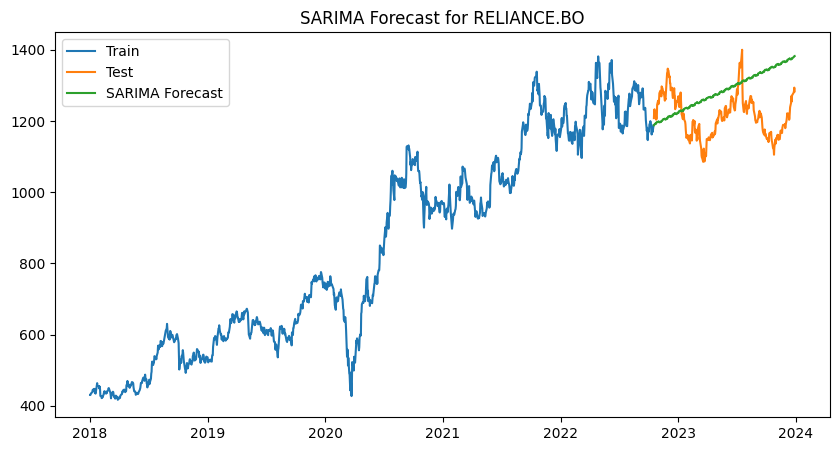

RMSE: 113.25865114133919
MAE: 98.72040788879087

SARIMA Model for BHARTIARTL.BO


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                      BHARTIARTL.BO   No. Observations:                 1184
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4420.535
Date:                            Sun, 12 Jan 2025   AIC                           8851.070
Time:                                    17:23:49   BIC                           8876.398
Sample:                                         0   HQIC                          8860.623
                                           - 1184                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4610      0.204      2.265      0.024       0.062       0.860
ma.L1         -0.5347      0.197   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


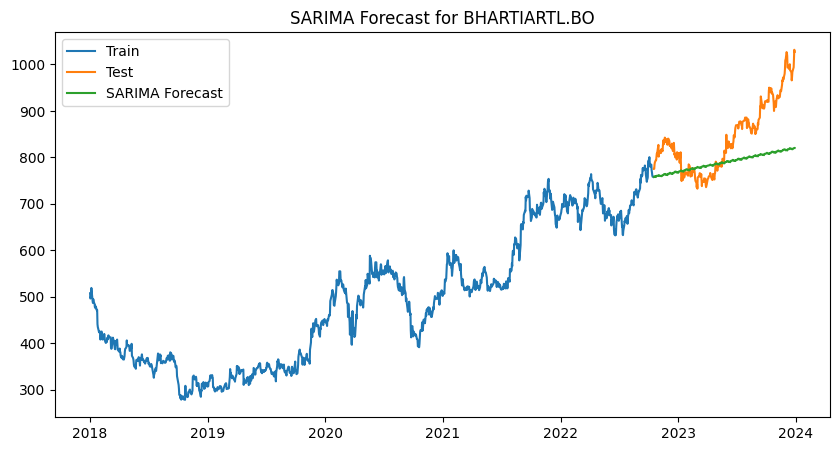

RMSE: 81.62201783301562
MAE: 64.18936414514816

SARIMA Model for SBIN.BO


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            SBIN.BO   No. Observations:                 1184
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3905.449
Date:                            Sun, 12 Jan 2025   AIC                           7820.897
Time:                                    17:23:56   BIC                           7846.225
Sample:                                         0   HQIC                          7830.449
                                           - 1184                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8663      0.137      6.329      0.000       0.598       1.135
ma.L1         -0.8392      0.148   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


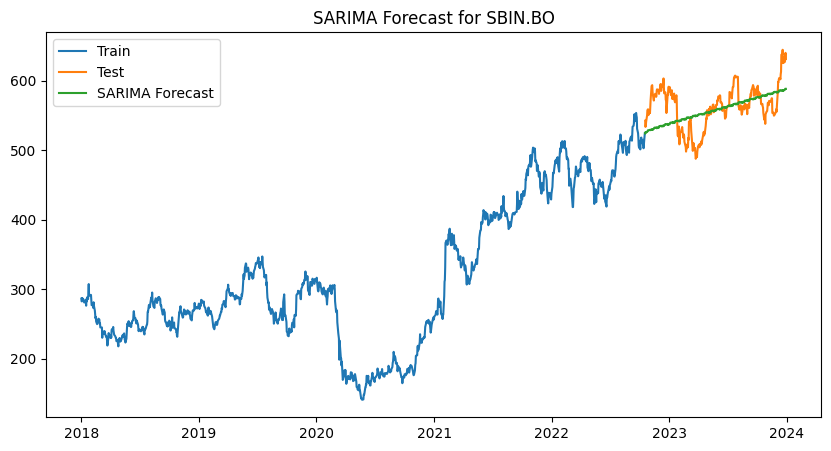

RMSE: 30.71601545687082
MAE: 25.022278109307337


In [ ]:
# SARIMA Modeling
for stock in stocks:
    print(f"\nSARIMA Model for {stock}")
    model = SARIMAX(train[stock], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_result = model.fit()
    print(sarima_result.summary())

    # Forecasting done by SARIMA and plotting of results
    forecast = sarima_result.forecast(steps=len(test))
    plt.figure(figsize=(10, 5))
    plt.plot(train[stock], label="Train")
    plt.plot(test[stock], label="Test")
    plt.plot(test.index, forecast, label="SARIMA Forecast")
    plt.title(f"SARIMA Forecast for {stock}")
    plt.legend()
    plt.show()

    # Calculate error metrics
    rmse = sqrt(mean_squared_error(test[stock], forecast))
    mae = mean_absolute_error(test[stock], forecast)
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")


Forecasting the next 30 days for RELIANCE.BO


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


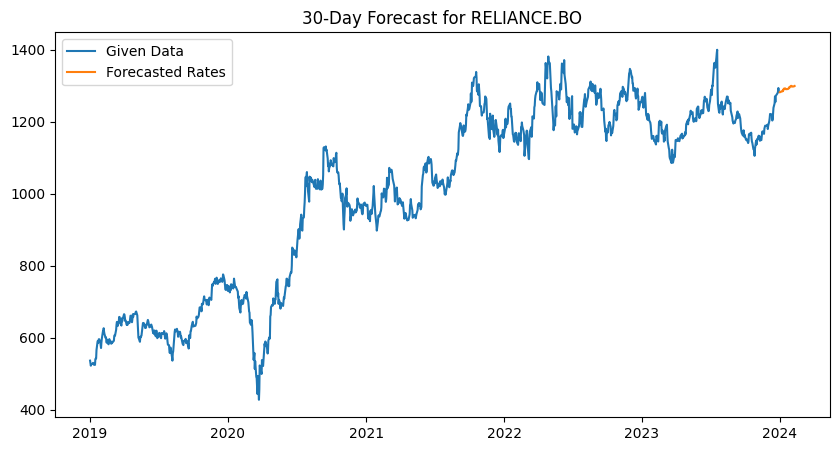


Forecasting the next 30 days for BHARTIARTL.BO


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


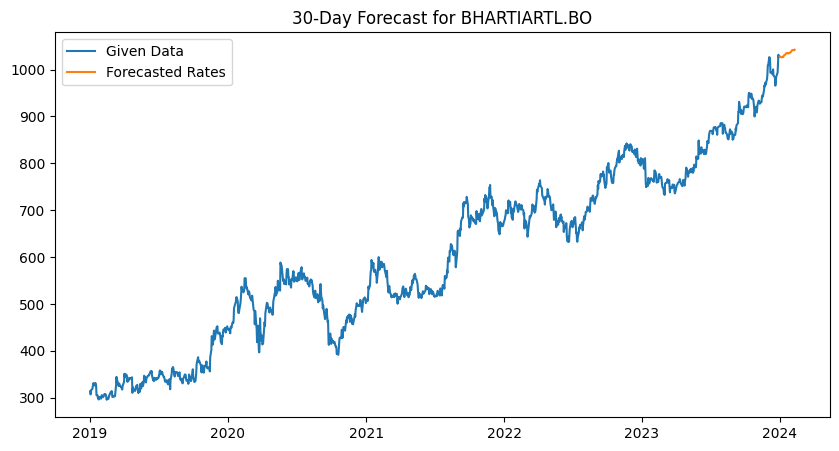


Forecasting the next 30 days for SBIN.BO


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


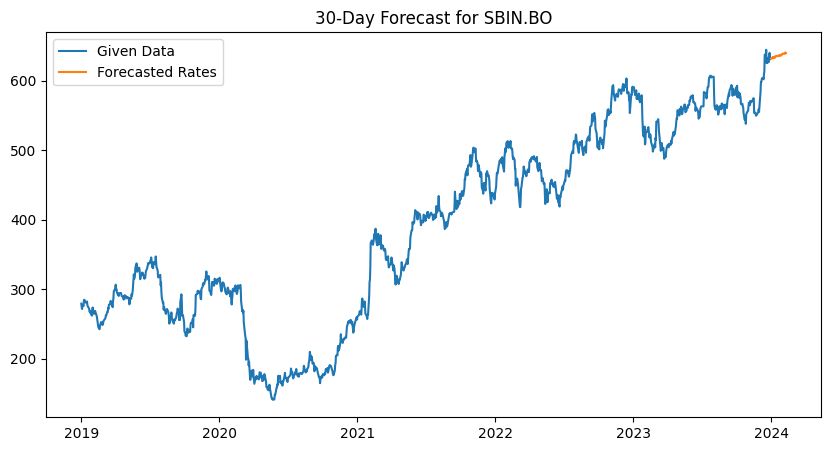

In [ ]:
# Task 4: Forecasting and Prediction
# Forecast the next 30 days
future_days = 30
for stock in stocks:
    print(f"\nForecasting the next {future_days} days for {stock}")
    model = SARIMAX(df[stock], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    result = model.fit()

    future_forecast = result.forecast(steps=future_days)
    plt.figure(figsize=(10, 5))
    plt.plot(df[stock], label="Given Data")
    plt.plot(pd.date_range(df.index[-1], periods=future_days + 1, freq="B")[1:], future_forecast, label="Forecasted Rates")
    plt.title(f"30-Day Forecast for {stock}")
    plt.legend()
    plt.show()



In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Task 1: Fetch Stock Data
def fetch_stock_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)["Close"]
    return data

# Task 1: Split Data into Train and Test
def train_test_split(series, split_ratio=0.8):
    train_size = int(len(series) * split_ratio)
    train, test = series[:train_size], series[train_size:]
    return train, test

# Task 2: Perform ADF Test for Stationarity
def adf_test(series):
    result = adfuller(series)
    return result[1]  # p-value

# Task 2: Differencing to Make Data Stationary
def make_stationary(series):
    diff_series = series.diff().dropna()
    return diff_series

# Task 2: Fit ARIMA Model
def fit_arima(series):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for p in range(3):
        for d in range(2):
            for q in range(3):
                try:
                    model = ARIMA(series, order=(p, d, q)).fit()
                    if model.aic < best_aic:
                        best_aic = model.aic
                        best_order = (p, d, q)
                        best_model = model
                except:
                    continue
    return best_model

# Task 3: Prepare Data for LSTM
def prepare_lstm_data(residuals, time_steps=10):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(residuals.values.reshape(-1, 1))
    X, y = [], []
    for i in range(len(scaled_data) - time_steps):
        X.append(scaled_data[i:i + time_steps])
        y.append(scaled_data[i + time_steps])
    return np.array(X), np.array(y), scaler

# Task 3: Build LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Task 4: Forecast Using ARIMA-LSTM Hybrid Model
def forecast_hybrid(series, test_size, lstm_epochs=10, time_steps=10):
    # ARIMA Step
    stationary_series = make_stationary(series)
    arima_model = fit_arima(stationary_series)
    arima_residuals = arima_model.resid

    # LSTM Step
    X_train, y_train, scaler = prepare_lstm_data(arima_residuals, time_steps)
    model = build_lstm_model((time_steps, 1))
    model.fit(X_train, y_train, epochs=5, batch_size=16, verbose=1)

    # Generate forecasts for test period
    arima_forecast = arima_model.forecast(steps=test_size)
    arima_forecast = pd.Series(arima_forecast, index=series.index[-test_size:])  # Fix Index

    lstm_input = X_train[-test_size:]
    lstm_predictions = model.predict(lstm_input)
    lstm_predictions = scaler.inverse_transform(lstm_predictions)

    # Adjust scale
    final_forecast = arima_forecast.values + lstm_predictions.flatten()

    return final_forecast, arima_forecast, lstm_predictions

# Task 5: Main Execution
ticker = 'TCS.NS'  # Example Stock
start_date = '2014-01-01'
end_date = '2024-01-01'
stock_data = fetch_stock_data(ticker, start_date, end_date)

# Task 5: Split Data
train_data, test_data = train_test_split(stock_data)

# Get test size
test_size = len(test_data)

# Task 5: Forecasting
forecast, arima_forecast, lstm_predictions = forecast_hybrid(train_data, (1,1,1), test_size)

# Task 6: Evaluation
def evaluate_model(actual, predicted):
    mape = mean_absolute_percentage_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mape, rmse

mape, rmse = evaluate_model(test_data[:len(forecast)], forecast)
print(f"MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

# Task 6: Plot Results
plt.figure(figsize=(12,6))
plt.plot(stock_data.index[:len(forecast)], stock_data.values[:len(forecast)], label='Actual')
plt.plot(stock_data.index[:len(forecast)], forecast, label='Hybrid Forecast', linestyle='dashed')
plt.legend()
plt.title(f'Stock Price Forecast for {ticker}')
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0227
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0178
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0167
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0179


KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'